#### Importing Libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [44]:
df = pd.read_csv('/Users/hpourmand/Desktop/Coursera/Olympics/olympics.csv', encoding='ISO-8859-1')
df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


#### Basic Data Information

In [45]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None
               Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976.000000
25%     1984.000000
50%     1996.000000
75%     2004.000000
max     2008.000000


#### Find and Remove Duplicates

In [46]:
duplicate_rows = df[df.duplicated()]
print(f'Number of duplicate rows: {len(duplicate_rows)}')

# Remove duplicates
df = df.drop_duplicates()

print(f'Shape of the dataset after removing duplicates: {df.shape}')

Number of duplicate rows: 117
Shape of the dataset after removing duplicates: (15316, 11)


#### Find Missing Values

In [50]:
# Check for duplicates
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Columns with missing values
missing_columns = missing_values[missing_values > 0].index
print(f'Columns with missing values: {missing_columns}')

Missing values in each column:
City            1
Year            1
Sport           1
Discipline      1
Event           1
Athlete         1
Gender          1
Country_Code    1
Country         1
Event_gender    1
Medal           1
dtype: int64
Columns with missing values: Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')


#### Impute Missing Values

In [51]:
for column in missing_columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

# Verify if missing values are handled
print('Missing values after imputation:')
print(df.isnull().sum())

Missing values after imputation:
City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64


/var/folders/z8/rs29j2g93hb0w4pdz9_5pl400000gn/T/ipykernel_1531/113166364.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
/var/folders/z8/rs29j2g93hb0w4pdz9_5pl400000gn/T/ipykernel_1531/113166364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mode()[0],

#### Medal distribution by country

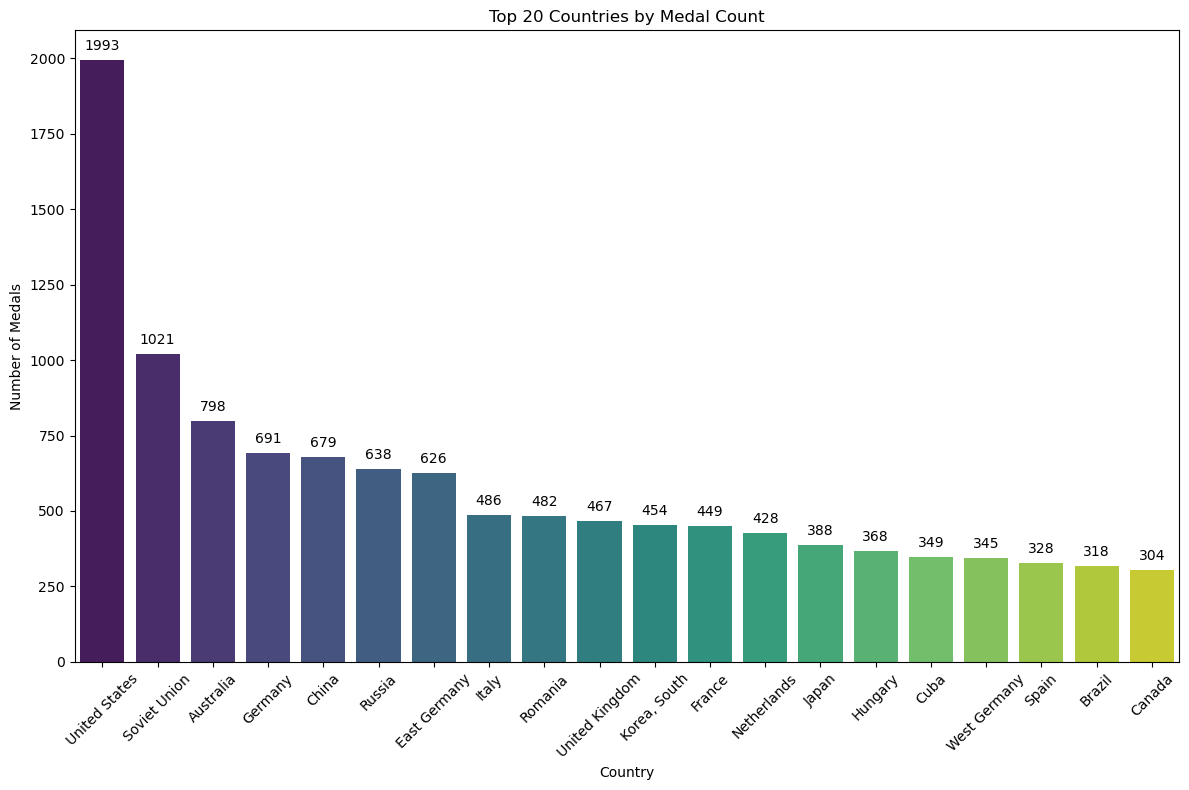

In [62]:
plt.figure(figsize = (12, 8))

# Calculate the top 20 countries by medal count
medal_count = df['Country'].value_counts().head(20)

# Create the bar plot and capture the Axes object
ax = sns.barplot(x = medal_count.index, y = medal_count.values, palette = 'viridis')

# The title and labels
plt.title('Top 20 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate each bar with its corresponding value
for p in ax.patches:
    # Get the height of the bar
    height = p.get_height()
    # Place the text annotation slightly above the top of the bar
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Display the plot
plt.tight_layout()  
plt.show()


#### Medal distribution by year

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


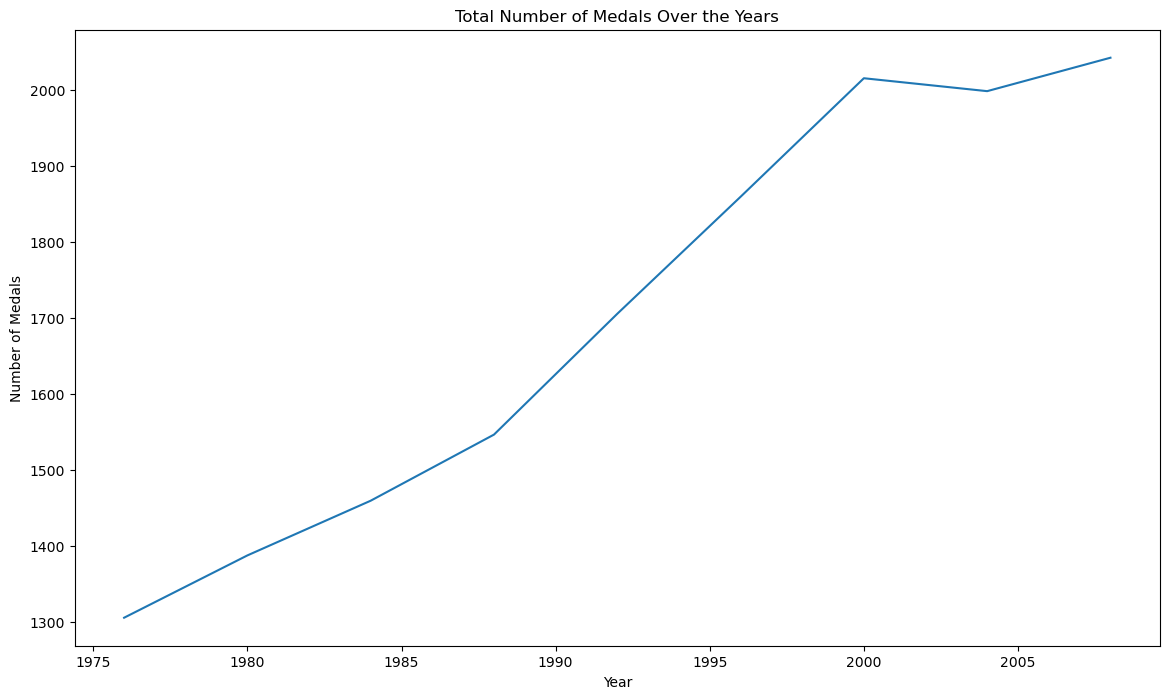

In [8]:
plt.figure(figsize = (14, 8))
yearly_medals = df.groupby('Year')['Medal'].count()
sns.lineplot(x = yearly_medals.index, y = yearly_medals.values)
plt.title('Total Number of Medals Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()

#### Top athletes by medal count

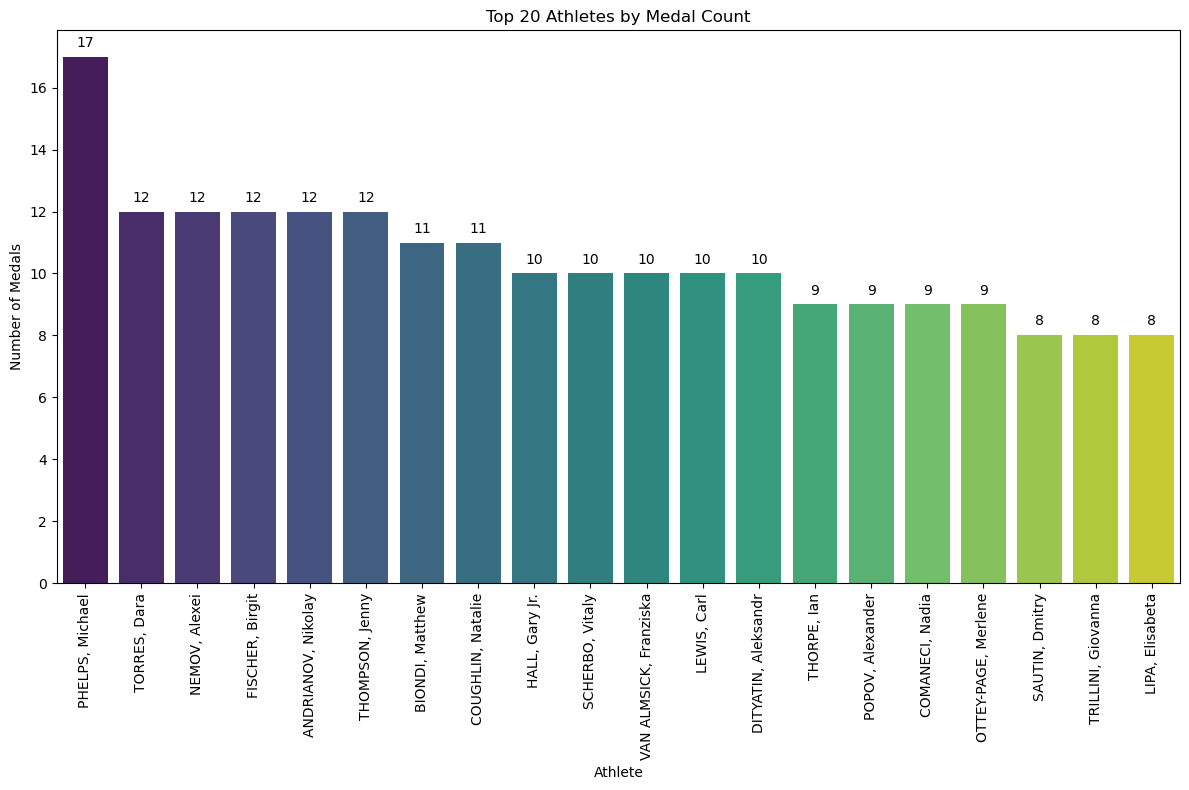

In [63]:
plt.figure(figsize = (12, 8))
top_athletes = df['Athlete'].value_counts().head(20)
ax = sns.barplot(x = top_athletes.index, y = top_athletes.values, palette = 'viridis')
plt.title('Top 20 Athletes by Medal Count')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)

for p in ax.patches:
    height = p.get_height() 
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()  
plt.show()

#### Medal distribution by sport

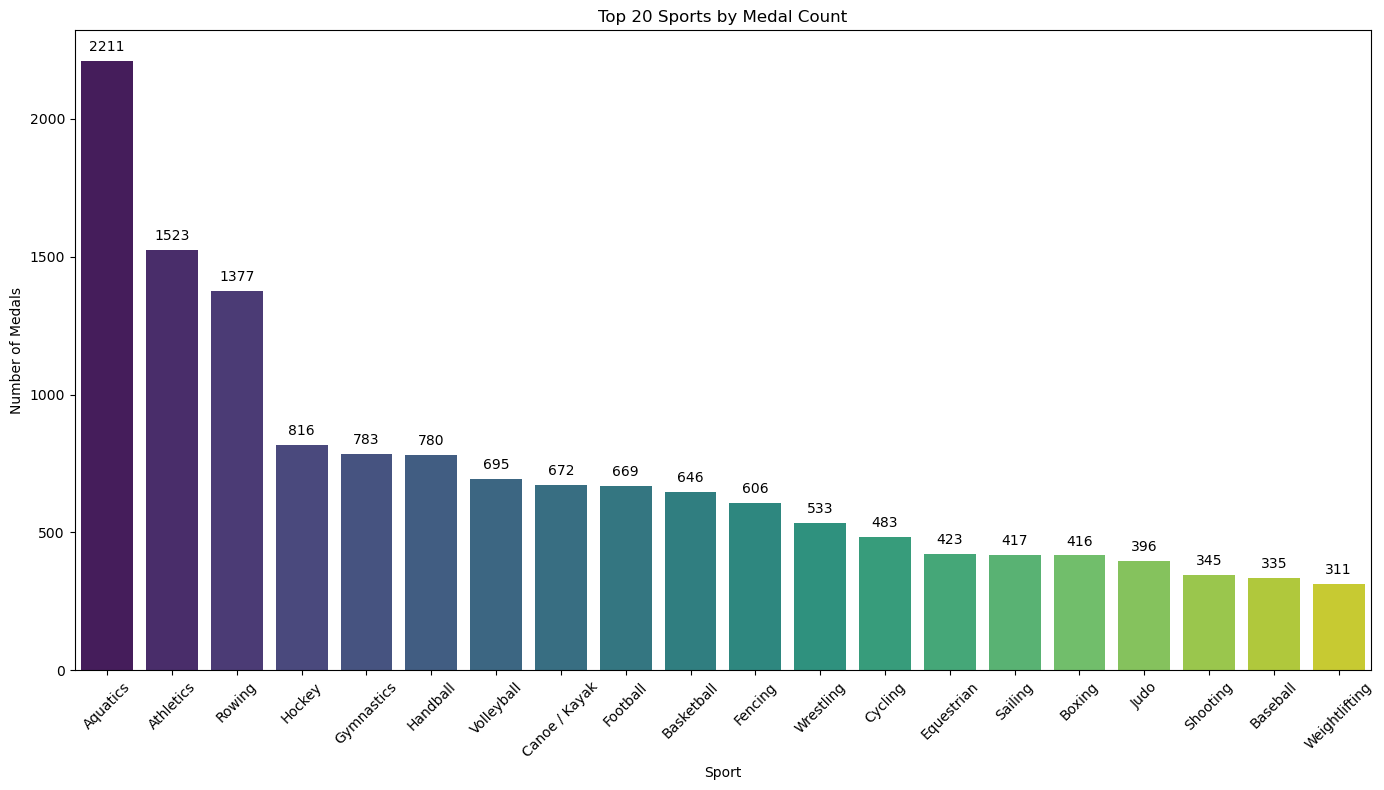

In [64]:
plt.figure(figsize = (14, 8))
top_sports = df['Sport'].value_counts().head(20)
ax = sns.barplot(x=top_sports.index, y=top_sports.values, palette='viridis')
plt.title('Top 20 Sports by Medal Count')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()  
plt.show()

#### Medal distribution by gender

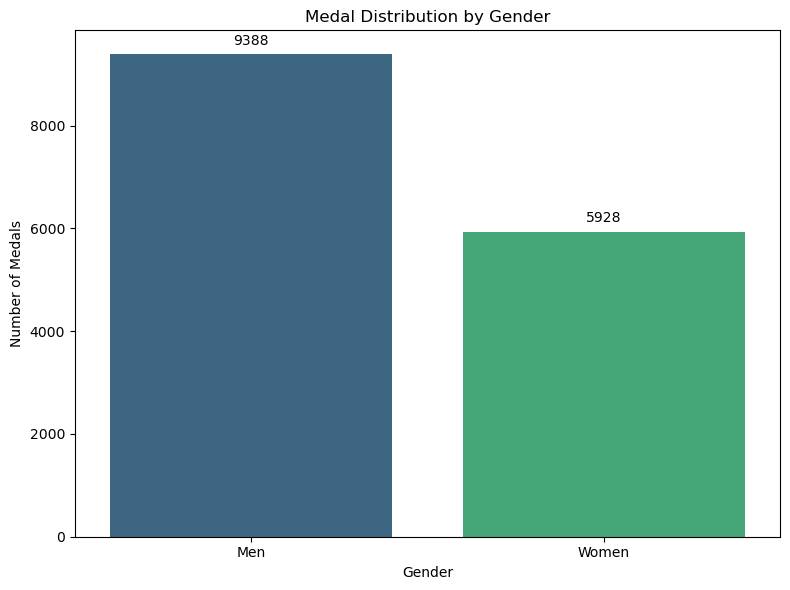

In [65]:
plt.figure(figsize = (8, 6))
gender_count = df['Gender'].value_counts()
ax = sns.barplot(x = gender_count.index, y = gender_count.values, palette = 'viridis')
plt.title('Medal Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()  
plt.show()


#### Distribution of medals (Gold, Silver, Bronze)

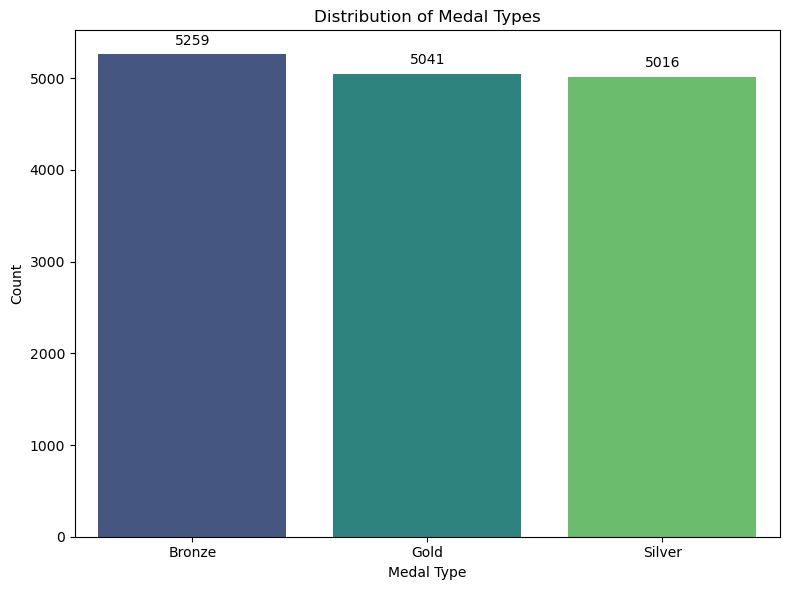

In [66]:
plt.figure(figsize=(8, 6))
medal_type_count = df['Medal'].value_counts()
ax = sns.barplot(x=medal_type_count.index, y=medal_type_count.values, palette='viridis')
plt.title('Distribution of Medal Types')
plt.xlabel('Medal Type')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), 
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()  
plt.show()
